# Load data

In [198]:
import gseapy as gp

In [199]:
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt

In [200]:
import mygene
import networkx as nx
import scanpy as sc

# Read data

In [254]:
#adata = ad.read_h5ad("/storage/users/data/PANC/storage/users/data/PANC/H5AD_file/adata_filtered_no2D_hvg_clust_time_pub.h5ad")
#'/storage/users/data/PANC/MA_time_adata_10066.h5ad'
#adata = ad.read_h5ad("/storage/users/data/PANC/H5AD_file/adata_filtered_no2D_hvg_clust_time_pub.h5ad")
#adata = sc.read('/storage/users/data/PANC/H5AD_file/adata_filtered_no2D_hvg_clust_palantir.h5ad')
adata = ad.read_h5ad("/storage/users/data/PANC/H5AD_file/adata_filtered_no2D_hvg_clust.h5ad")#last adta according to github

In [255]:
## make trivial names unique
#adata.var_names = adata.var_names.astype(str)
#adata.var_names_make_unique()

In [256]:
adata

AnnData object with n_obs × n_vars = 6281 × 1992
    obs: 'condition', 'pct_cmo', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'outlier', 'leiden'
    var: 'CMO', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_symbol', 'ensembl_gene_id', 'mito', 'ribo', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [257]:
adata.obs.head()

,condition,pct_cmo,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mito,log1p_total_counts_mito,pct_counts_mito,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,doublet_scores,predicted_doublets,outlier,leiden
barcode,,,,,,,,,,,,,,,,,,,,
AAACCCAGTAGGCTCC-1,CTRL_1,24.628355,3076,8.031710,15109,9.623112,41.683765,55.569528,65.404726,76.126812,324,5.783825,2.144417,6545,8.786609,43.318552,0.040581,False,False,0
AAACCCAGTCGCAACC-1,CTRL_1,34.891727,4271,8.359837,18912,9.847605,38.055203,49.434222,57.741117,67.951565,354,5.872118,1.871827,7061,8.862484,37.336083,0.089431,False,False,0
AAACCCATCCACAAGT-1,CTRL_1,23.580470,3517,8.165648,14791,9.601842,34.548036,45.101751,55.628423,68.643094,212,5.361292,1.433304,4165,8.334712,28.159016,0.048303,False,False,0
AAACGCTTCACTACGA-1,CTRL_1,23.367459,4077,8.313362,18788,9.841027,37.710241,49.371940,58.888652,69.693421,479,6.173786,2.549500,6108,8.717518,32.510113,0.116329,False,False,0
AAAGAACAGATACAGT-1,CTRL_1,13.318522,4382,8.385489,21458,9.973899,39.076335,51.262932,60.322490,70.244198,522,6.259581,2.432659,8475,9.044994,39.495759,0.048303,False,False,0


### Create dictionary

In [258]:
import mygene

# Extract Ensembl Gene IDs from combined_adata
ensembl_ids = adata.var_names.tolist()

# Initialize MyGene.info client
mg = mygene.MyGeneInfo()

# Query MyGene.info for mappings
print("Querying MyGene.info...")
results = mg.querymany(
    ensembl_ids,
    scopes="ensembl.gene",
    fields="symbol",
    species="human"
)

# Initialize an empty dictionary to store the mapping
ensembl_to_gene_name = {}

# Populate the dictionary
print("Processing results...")
for res in results:
    ensembl_id = res.get("query")
    if "notfound" in res:
        # Skip if not found
        continue
    # Use the symbol field as the gene name
    ensembl_to_gene_name[ensembl_id] = res.get("symbol", ensembl_id)

# Display the resulting dictionary
print("\nEnsembl to Gene Name mapping:")
#print(ensembl_to_gene_name)


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Querying MyGene.info...


3 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000226519', 2), ('ENSG00000262352', 3)]
32 input query terms found no hit:	['ENSG00000286863', 'ENSG00000275557', 'ENSG00000231877', 'ENSG00000233005', 'ENSG00000237838', 'ENS


Processing results...

Ensembl to Gene Name mapping:


In [259]:
adata.var["ensembl_gene_id"] = adata.var_names.astype(str)

In [260]:
adata.var["gene_symbol"] = adata.var_names.map(ensembl_to_gene_name)

In [261]:
adata.var["gene_symbol"] = adata.var["gene_symbol"].fillna(adata.var["ensembl_gene_id"])

print("Remaining NaN in 'gene_symbol':", adata.var["gene_symbol"].isna().sum())


Remaining NaN in 'gene_symbol': 0


In [262]:
adata.var_names = adata.var['gene_symbol']

In [263]:
adata.var_names

Index(['HES4', 'ISG15', 'ENSG00000224969', 'C1QTNF12', 'CFAP74',
       'ENSG00000287586', 'PER3', 'ERRFI1-DT', 'GPR157', 'MFAP2',
       ...
       'LOC105373347', 'EOLA2-DT', 'MAMLD1', 'HMGB3', 'GABRA3', 'PNMA5', 'BGN',
       'ATP2B3', 'AMELY', 'MT-ATP6'],
      dtype='object', name='gene_symbol', length=1992)

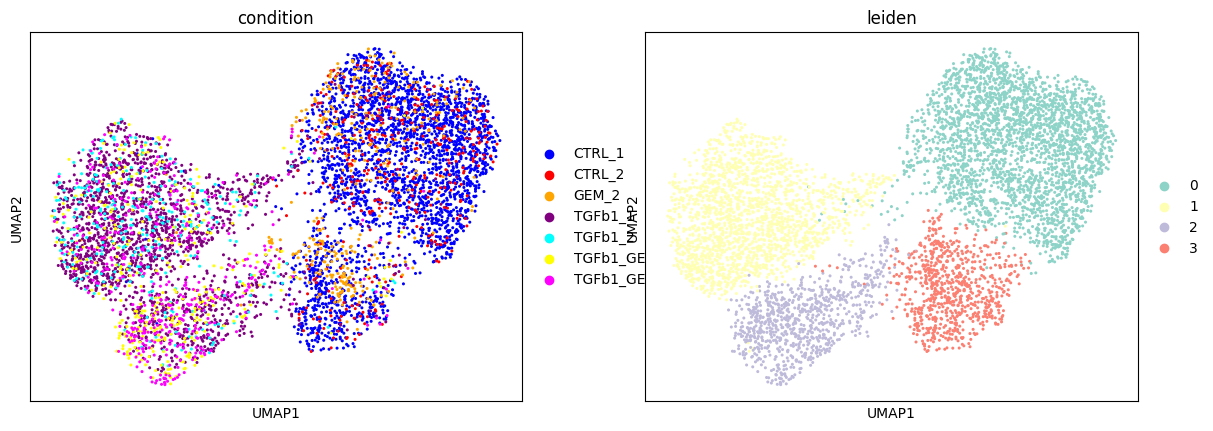

In [264]:
sc.pl.umap(adata, color=[ "condition","leiden"])

In [265]:
print(adata.obs.columns)  # Find the Leiden column name

Index(['condition', 'pct_cmo', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mito',
       'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_scores',
       'predicted_doublets', 'outlier', 'leiden'],
      dtype='object')


In [223]:
print(adata.obs['leiden'].unique())


['0', '3', '2', '1']
Categories (4, object): ['0', '1', '2', '3']


In [224]:
group1 = '1_Leiden_2'
group2 = '2_Leiden_3'

group1_cluster = ['2']
group2_cluster = ['3']


In [225]:
def label_clusters(cluster):
    if cluster in group1_cluster:
        return group1
    elif cluster in group2_cluster:
        return group2
    else:
        return "NA"


In [226]:
adata.obs['compare_clusters'] = adata.obs['leiden'].map(label_clusters)


## Subset and run GSEA

In [227]:
bdata = adata[adata.obs.compare_clusters.isin([group1, group2])].copy()
bdata = bdata[bdata.obs.sort_values('compare_clusters').index]
expression_df = bdata.to_df().T

res = gp.gsea(
    data=expression_df,
    gene_sets="MSigDB_Hallmark_2020",
    cls=bdata.obs.compare_clusters,
    permutation_num=1000,
    outdir=None,
    min_size=10,
    max_size=500,
    method='log2_ratio_of_classes',
    threads=4
)


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


In [228]:
res.res2d.sort_values(by='FDR q-val').head(10)



,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
4,gsea,Apoptosis,0.534898,1.533857,0.107843,0.252593,0.527,13/37,22.72%,IL1B;TNF;IL1A;BGN;TIMP3;NEDD9;MMP2;TNFSF10;SMA...
6,gsea,PI3K/AKT/mTOR Signaling,0.51353,1.45279,0.079741,0.282999,0.691,3/13,21.91%,NGF;CAMK4;CDKN1A
3,gsea,mTORC1 Signaling,0.458607,1.540986,0.067729,0.304923,0.513,14/31,48.05%,IGFBP5;TUBA4A;EGLN3;CDKN1A;SLC2A3;STC1;BCAT1;S...
5,gsea,UV Response Dn,0.487418,1.461417,0.101761,0.315741,0.67,15/38,31.89%,IGFBP5;COL1A1;INPP4B;COL1A2;PRKAR2B;F3;SMAD7;P...
2,gsea,Hypoxia,0.39857,1.554435,0.068966,0.37718,0.496,31/57,41.21%,BGN;PKP1;COL5A1;ACKR3;CHST2;LOX;NCAN;GPC4;SRPX...
8,gsea,Androgen Response,0.368005,1.321324,0.140461,0.445386,0.913,16/24,48.05%,MAF;INPP4B;IQGAP2;ADAMTS1;PMEPA1;NDRG1;ELL2;BM...
1,gsea,p53 Pathway,0.509215,1.586283,0.068898,0.479222,0.441,12/38,27.39%,KRT17;IL1A;PTPRE;VDR;SLC19A2;TGFA;FGF13;CDKN1A...
7,gsea,KRAS Signaling Up,0.623127,1.331912,0.116236,0.480223,0.905,14/55,15.35%,WNT7A;MAFB;IL1B;TMEM100;IKZF1;SPP1;NGF;CPE;G0S...
0,gsea,TGF-beta Signaling,0.558066,1.73407,0.0,0.556153,0.288,12/16,38.99%,THBS1;SMAD7;PMEPA1;NOG;LTBP2;SMURF2;TGFBR1;ID2...
10,gsea,Epithelial Mesenchymal Transition,0.573077,1.213133,0.249117,0.681809,0.985,47/89,28.20%,POSTN;MMP3;CDH6;BGN;SPP1;FAP;TIMP3;COL5A1;THBS...


In [229]:

res.res2d.columns


Index(['Name', 'Term', 'ES', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val',
       'Tag %', 'Gene %', 'Lead_genes'],
      dtype='object')

/tmp/ipykernel_572736/3144534122.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_res, y='Term', x='-log10(FDR)', palette='magma')


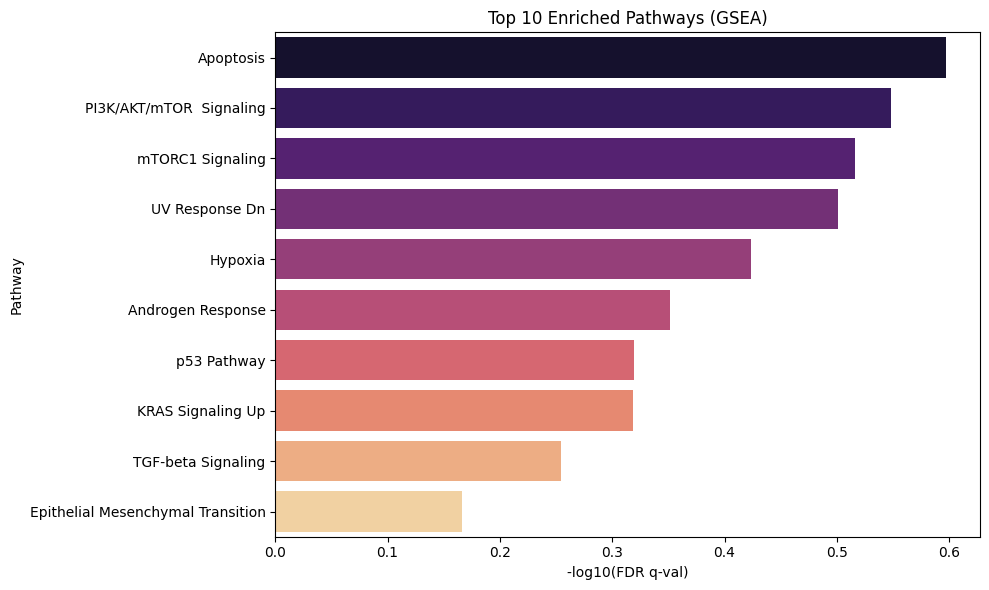

In [230]:
##### import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'FDR q-val' to numeric (force errors to NaN), drop NaNs
res.res2d['FDR q-val'] = pd.to_numeric(res.res2d['FDR q-val'], errors='coerce')
filtered_res = res.res2d.dropna(subset=['FDR q-val'])

# Sort and select top 10
top_res = filtered_res.sort_values(by='FDR q-val').head(10).copy()

# Compute -log10(FDR)
top_res['-log10(FDR)'] = -np.log10(top_res['FDR q-val'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_res, y='Term', x='-log10(FDR)', palette='magma')
plt.title('Top 10 Enriched Pathways (GSEA)')
plt.xlabel('-log10(FDR q-val)')
plt.ylabel('Pathway')
plt.tight_layout()
plt.show()


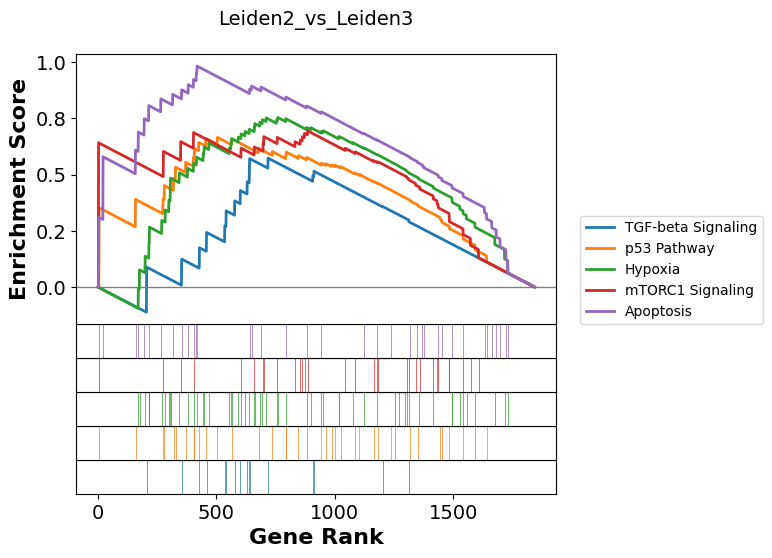

In [239]:
import matplotlib.pyplot as plt
from datetime import date

# Path where you want to save the figures
base_path_fig = "/home/maa81gb/single-cell-beta/figures/07_script_"
comparison = "Leiden2_vs_Leiden3"
current_date = date.today().strftime("%Y-%m-%d")

# Plot and save top 5 terms
terms = res.res2d.Term
fig = res.plot(terms[:5], show_ranking=False, legend_kws={'loc': (1.05, 0)})
# Add title to the figure
fig.suptitle(comparison, fontsize=14)
# # Save entire figure
fig.savefig(f"{base_path_fig}gsea_{comparison}_{current_date}.png", bbox_inches='tight')


## GESA analysis for Leiden Clusters in a Loop and save the gsea csv file


Processing comparison: Leiden3_vs_Leiden0


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results to: figures/gsea_Leiden3_vs_Leiden0.csv


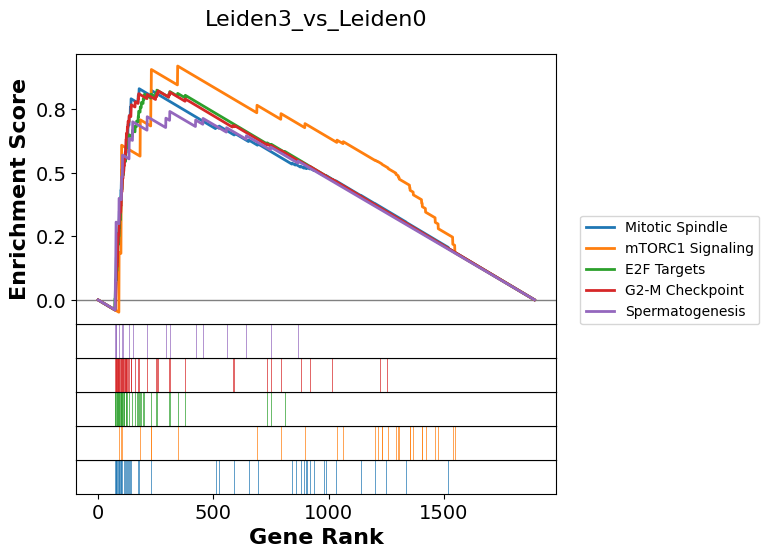

🖼️  Saved GSEA plot to: figures/gsea_Leiden3_vs_Leiden0.png

Processing comparison: Leiden2_vs_Leiden1


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results to: figures/gsea_Leiden2_vs_Leiden1.csv


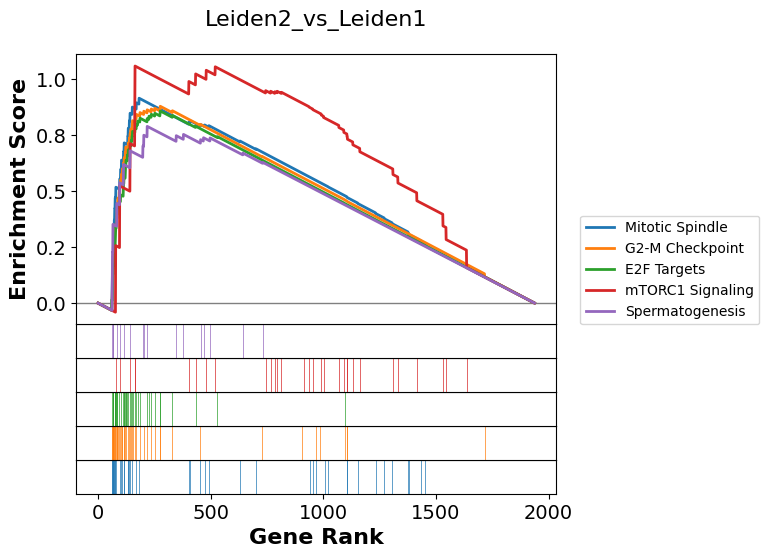

🖼️  Saved GSEA plot to: figures/gsea_Leiden2_vs_Leiden1.png

Processing comparison: Leiden1_vs_Leiden0


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results to: figures/gsea_Leiden1_vs_Leiden0.csv


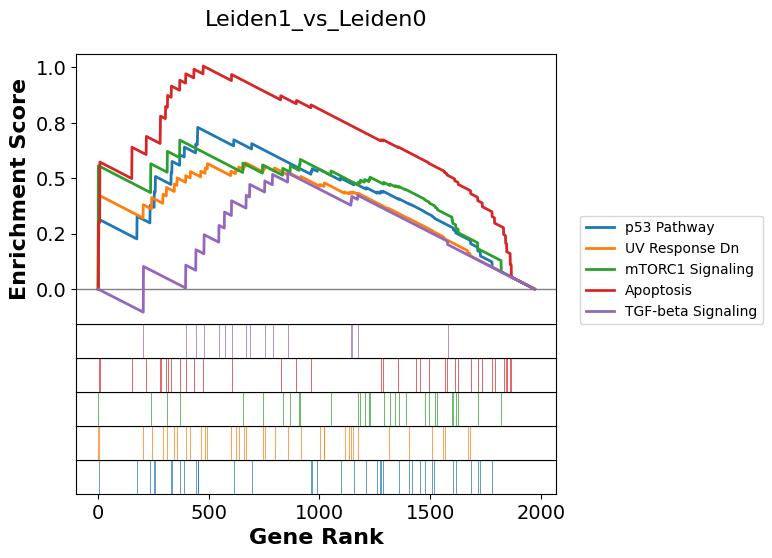

🖼️  Saved GSEA plot to: figures/gsea_Leiden1_vs_Leiden0.png

Processing comparison: Leiden2_vs_Leiden3


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results to: figures/gsea_Leiden2_vs_Leiden3.csv


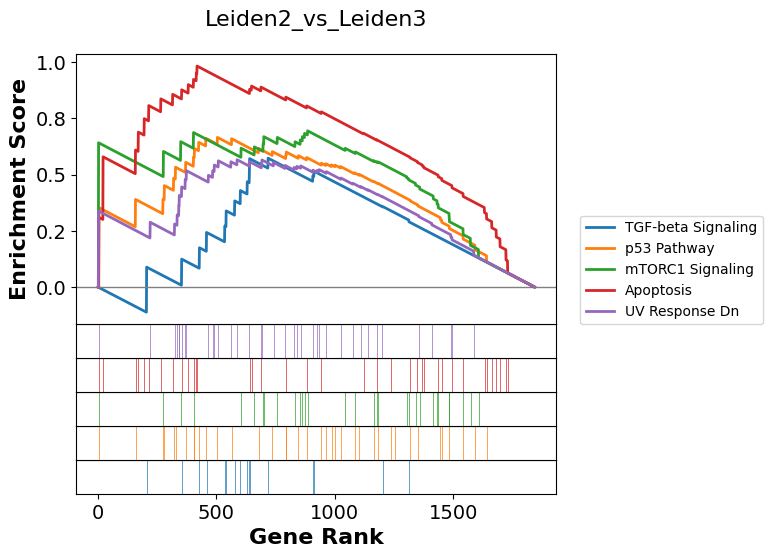

🖼️  Saved GSEA plot to: figures/gsea_Leiden2_vs_Leiden3.png


In [307]:
import os
import scanpy as sc
import gseapy as gp
import pandas as pd
import matplotlib.pyplot as plt

# Create output directory if it doesn't exist
os.makedirs("figures", exist_ok=True)

# Define your comparisons and clusters
comparisons = {
    "Leiden3_vs_Leiden0": (["3"], ["0"]),
    "Leiden2_vs_Leiden1": (["2"], ["1"]),
    "Leiden1_vs_Leiden0": (["1"], ["0"]),
    "Leiden2_vs_Leiden3": (["2"], ["3"]),
}

# Loop through each comparison
for comp_name, (group1_cluster, group2_cluster) in comparisons.items():
    print(f"\nProcessing comparison: {comp_name}")

    # Define group labels
    group1 = f"1_{comp_name.split('_vs_')[0]}"
    group2 = f"2_{comp_name.split('_vs_')[1]}"

    # Label function
    def label_clusters(cluster):
        if cluster in group1_cluster:
            return group1
        elif cluster in group2_cluster:
            return group2
        else:
            return "NA"

    # Apply labels to adata
    adata.obs['compare_clusters'] = adata.obs['leiden'].map(label_clusters)

    # Subset to relevant cells
    bdata = adata[adata.obs.compare_clusters.isin([group1, group2])].copy()
    if bdata.n_obs == 0:
        print(f"⚠️  Skipping {comp_name}: no matching cells found.")
        continue

    # Ensure consistent order
    sorted_indices = bdata.obs.sort_values(by='compare_clusters').index
    bdata = bdata[sorted_indices]

    # Extract expression matrix
    expression_df = bdata.to_df().T

    # Run GSEA
    try:
        res = gp.gsea(
            data=expression_df,
            gene_sets="MSigDB_Hallmark_2020",
            cls=bdata.obs.compare_clusters,
            permutation_num=1000,
            outdir=None,  # no auto-generated folder
            min_size=10,
            max_size=50,
            method='log2_ratio_of_classes',
            threads=8
        )

        # ✅ Save GSEA results to CSV
        csv_path = f"figures/gsea_{comp_name}.csv"
        res.res2d.to_csv(csv_path)
        print(f"📄 Saved GSEA results to: {csv_path}")

    except Exception as e:
        print(f"❌ Error in GSEA for {comp_name}: {e}")
        continue

    # Plot top 5 terms and save
    try:
        terms = res.res2d.Term
        fig = res.plot(terms[:5], show_ranking=False, legend_kws={'loc': (1.05, 0)})
        fig.suptitle(comp_name, fontsize=16)
        fig_path = f"figures/gsea_{comp_name}.png"
        fig.savefig(fig_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"🖼️  Saved GSEA plot to: {fig_path}")
    except Exception as e:
        print(f"⚠️  Plotting failed for {comp_name}: {e}")


## GESA analysis for conditions in a Loop


🔎 Running GSEA for: TGFb1_2_vs_CTRL


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results: figures/gsea_TGFb1_2_vs_CTRL.csv


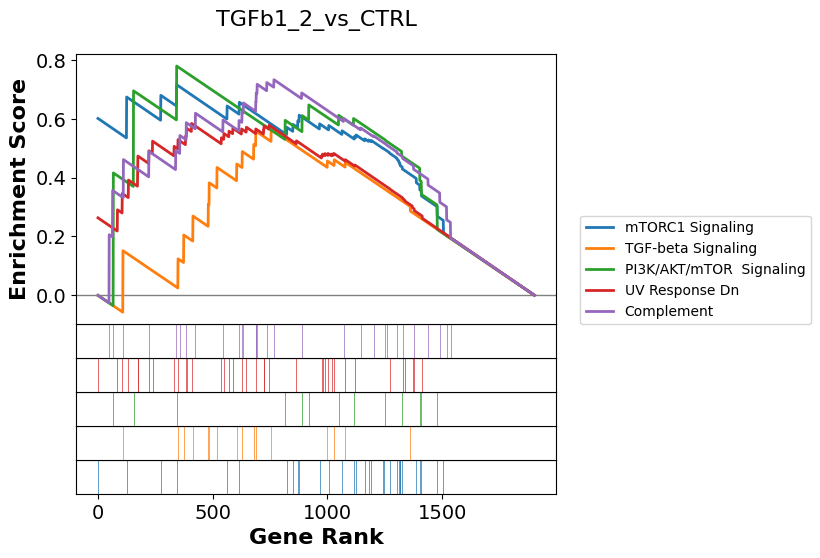

🖼️  Saved GSEA plot: figures/gsea_TGFb1_2_vs_CTRL.png

🔎 Running GSEA for: GEM_2_vs_CTRL


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results: figures/gsea_GEM_2_vs_CTRL.csv


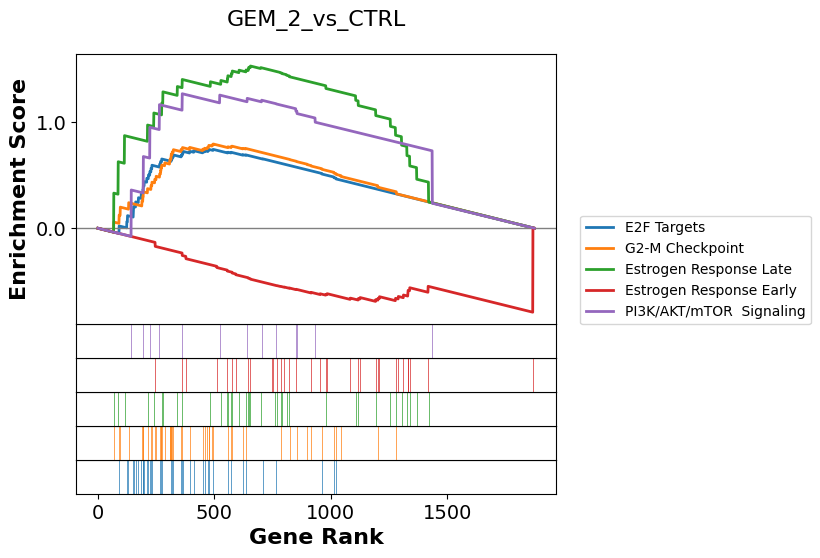

🖼️  Saved GSEA plot: figures/gsea_GEM_2_vs_CTRL.png

🔎 Running GSEA for: TGFb1_GEM_vs_TGFb1


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results: figures/gsea_TGFb1_GEM_vs_TGFb1.csv


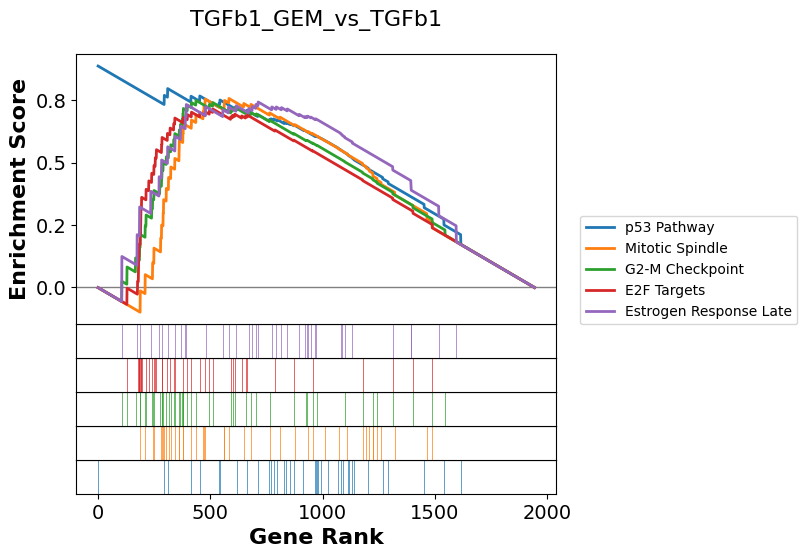

🖼️  Saved GSEA plot: figures/gsea_TGFb1_GEM_vs_TGFb1.png


In [306]:
import os
import scanpy as sc
import gseapy as gp
import pandas as pd
import matplotlib.pyplot as plt

# Ensure output folder exists
os.makedirs("figures", exist_ok=True)

# Define your condition-based comparisons
condition_comparisons = {
    "TGFb1_2_vs_CTRL": (["TGFb1_2"], ["CTRL_1", "CTRL_2"]),
    "GEM_2_vs_CTRL": (["GEM_2"], ["CTRL_1", "CTRL_2"]),
    "TGFb1_GEM_vs_TGFb1": (["TGFb1_GEM_1", "TGFb1_GEM_2"], ["TGFb1_1", "TGFb1_2"]),
}

# Loop through each condition comparison
for comp_name, (group1_cluster, group2_cluster) in condition_comparisons.items():
    print(f"\n🔎 Running GSEA for: {comp_name}")
    
    # Define group labels
    group1 = f"1_{comp_name.split('_vs_')[0]}"
    group2 = f"2_{comp_name.split('_vs_')[1]}"

    # Label function
    def label_clusters(cluster):
        if cluster in group1_cluster:
            return group1
        elif cluster in group2_cluster:
            return group2
        else:
            return "NA"

    # Assign group labels based on condition
    adata.obs['compare_clusters'] = adata.obs['condition'].map(label_clusters)

    # Subset relevant cells
    bdata = adata[adata.obs.compare_clusters.isin([group1, group2])].copy()
    if bdata.n_obs == 0:
        print(f"⚠️ Skipping {comp_name}: no cells matched.")
        continue

    # Ensure consistent order
    bdata = bdata[bdata.obs.sort_values('compare_clusters').index]

    # Get expression matrix
    expression_df = bdata.to_df().T

    # Run GSEA
    try:
        res = gp.gsea(
            data=expression_df,
            gene_sets="MSigDB_Hallmark_2020",
            cls=bdata.obs.compare_clusters,
            permutation_num=1000,
            outdir=None,
            min_size=10,
            max_size=50,
            method='log2_ratio_of_classes',
            threads=8
        )

        # ✅ Save GSEA results to CSV
        csv_path = f"figures/gsea_{comp_name}.csv"
        res.res2d.to_csv(csv_path)
        print(f"📄 Saved GSEA results: {csv_path}")

    except Exception as e:
        print(f"❌ GSEA failed for {comp_name}: {e}")
        continue

    # Plot top 5 enriched terms and save
    try:
        terms = res.res2d.Term
        fig = res.plot(terms[:5], show_ranking=False, legend_kws={'loc': (1.05, 0)})
        fig.suptitle(comp_name, fontsize=16)
        fig_path = f"figures/gsea_{comp_name}.png"
        fig.savefig(fig_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"🖼️  Saved GSEA plot: {fig_path}")
    except Exception as e:
        print(f"⚠️ Plotting failed for {comp_name}: {e}")


In [233]:
pwd!

'/home/maa81gb/single-cell-beta'

### Define new obs/category of cells (GEM subset of leiden)

In [300]:
# Number of cells in Leiden 3
count_leiden3 = (adata.obs['leiden'] == '3').sum()
print(f"Total cells in Leiden 3: {count_leiden3}")

# Number of cells in Leiden 3 AND condition == GEM_2
count_leiden3_gem2 = ((adata.obs['leiden'] == '3') & (adata.obs['condition'] == 'GEM_2')).sum()
print(f"Cells in Leiden 3 and GEM_2: {count_leiden3_gem2}")

# Number of cells in Leiden 0
count_leiden0 = (adata.obs['leiden'] == '0').sum()
print(f"Total cells in Leiden 0: {count_leiden0}")

# Number of cells in Leiden 0 AND condition == GEM_2
count_leiden0_gem2 = ((adata.obs['leiden'] == '0') & (adata.obs['condition'] == 'GEM_2')).sum()
print(f"Cells in Leiden 0 and GEM_2: {count_leiden0_gem2}")

# Number of cells in Leiden 2
count_leiden2 = (adata.obs['leiden'] == '2').sum()
print(f"Total cells in Leiden 2: {count_leiden2}")

# Number of cells in Leiden 2 AND condition in [TGFb1_GEM_1, TGFb1_GEM_2]
count_leiden2_tgfb1_gem = ((adata.obs['leiden'] == '2') & 
                           (adata.obs['condition'].isin(['TGFb1_GEM_1', 'TGFb1_GEM_2']))).sum()
print(f"Cells in Leiden 2 and TGFb1_GEM_1/GEM_2: {count_leiden2_tgfb1_gem}")

# Number of cells in Leiden 1 AND condition in [TGFb1_GEM_1, TGFb1_GEM_2]
count_leiden1 = (adata.obs['leiden'] == '1').sum()
count_leiden1_tgfb1_gem = ((adata.obs['leiden'] == '1') & 
                           (adata.obs['condition'].isin(['TGFb1_GEM_1', 'TGFb1_GEM_2']))).sum()
print(f"Total cells in Leiden 1: {count_leiden1}")
print(f"Cells in Leiden 1 and TGFb1_GEM_1/GEM_2: {count_leiden1_tgfb1_gem}")


Total cells in Leiden 3: 765
Cells in Leiden 3 and GEM_2: 136
Total cells in Leiden 0: 2789
Cells in Leiden 0 and GEM_2: 189
Total cells in Leiden 2: 848
Cells in Leiden 2 and TGFb1_GEM_1/GEM_2: 401
Total cells in Leiden 1: 1879
Cells in Leiden 1 and TGFb1_GEM_1/GEM_2: 326


In [301]:
def label_leiden_gem(row):
    # row['leiden'] and row['condition'] are strings
    if row['leiden'] == '3' and row['condition'] == 'GEM_2':
        return 'Leiden3_GEM2'
    elif row['leiden'] == '0' and row['condition'] == 'GEM_2':
        return 'Leiden0_GEM2'
    elif row['leiden'] == '2' and row['condition'] in ['TGFb1_GEM_1', 'TGFb1_GEM_2']:
        return 'Leiden2_TGFb1_GEM'
    elif row['leiden'] == '1' and row['condition'] in ['TGFb1_GEM_1', 'TGFb1_GEM_2']:
        return 'Leiden1_TGFb1_GEM'
    else:
        return 'other'

adata.obs['leiden_gem'] = adata.obs.apply(label_leiden_gem, axis=1)

# Check resulting categories:
print(adata.obs['leiden_gem'].value_counts())

other                5229
Leiden2_TGFb1_GEM     401
Leiden1_TGFb1_GEM     326
Leiden0_GEM2          189
Leiden3_GEM2          136
Name: leiden_gem, dtype: int64


In [302]:
def label_leiden_gem_extended(row):
    # For Leiden 3
    if row['leiden'] == '3':
        if row['condition'] == 'GEM_2':
            return 'Leiden3_GEM2'
        else:
            return 'Leiden3_nonGEM2'
    # For Leiden 0
    elif row['leiden'] == '0':
        if row['condition'] == 'GEM_2':
            return 'Leiden0_GEM2'
        else:
            return 'Leiden0_nonGEM2'
    # For Leiden 2
    elif row['leiden'] == '2':
        if row['condition'] in ['TGFb1_GEM_1', 'TGFb1_GEM_2']:
            return 'Leiden2_TGFb1_GEM'
        else:
            return 'Leiden2_nonTGFb1_GEM'
    # For Leiden 1
    elif row['leiden'] == '1':
        if row['condition'] in ['TGFb1_GEM_1', 'TGFb1_GEM_2']:
            return 'Leiden1_TGFb1_GEM'
        else:
            return 'Leiden1_nonTGFb1_GEM'
    # For any other cells not falling into these categories
    else:
        return 'other'

# Apply the function to create a new observation column
adata.obs['leiden_gem_extended'] = adata.obs.apply(label_leiden_gem_extended, axis=1)

# Check the new groups
print(adata.obs['leiden_gem_extended'].value_counts())


Leiden0_nonGEM2         2600
Leiden1_nonTGFb1_GEM    1553
Leiden3_nonGEM2          629
Leiden2_nonTGFb1_GEM     447
Leiden2_TGFb1_GEM        401
Leiden1_TGFb1_GEM        326
Leiden0_GEM2             189
Leiden3_GEM2             136
Name: leiden_gem_extended, dtype: int64


# Individually define comparison : Define the Comparison and perform the GSEA analysis

## GSEA by Combined Leiden+Condition comparisons

In [303]:
adata.obs['leiden_gem']

barcode
AAACCCAGTAGGCTCC-1                other
AAACCCAGTCGCAACC-1                other
AAACCCATCCACAAGT-1                other
AAACGCTTCACTACGA-1                other
AAAGAACAGATACAGT-1                other
                            ...        
TTTACTGTCATTACTC-1                other
TTTCACAGTGATATAG-1    Leiden2_TGFb1_GEM
TTTCACATCGATGCAT-1    Leiden2_TGFb1_GEM
TTTCATGTCCCTCTAG-1    Leiden1_TGFb1_GEM
TTTGACTGTTCCGGTG-1    Leiden2_TGFb1_GEM
Name: leiden_gem, Length: 6281, dtype: object


🔎 Running GSEA for: Leiden3_GEM2_vs_Leiden0_GEM2


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results to: figures/gsea_Leiden3_GEM2_vs_Leiden0_GEM2.csv


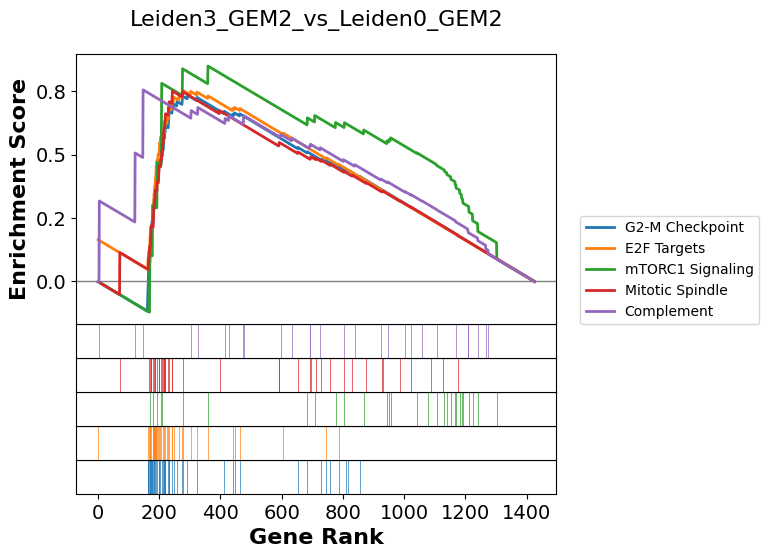

🖼️  Saved GSEA plot to: figures/gsea_Leiden3_GEM2_vs_Leiden0_GEM2.png

🔎 Running GSEA for: Leiden2_TGFb1_GEM_vs_Leiden1_TGFb1_GEM


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results to: figures/gsea_Leiden2_TGFb1_GEM_vs_Leiden1_TGFb1_GEM.csv


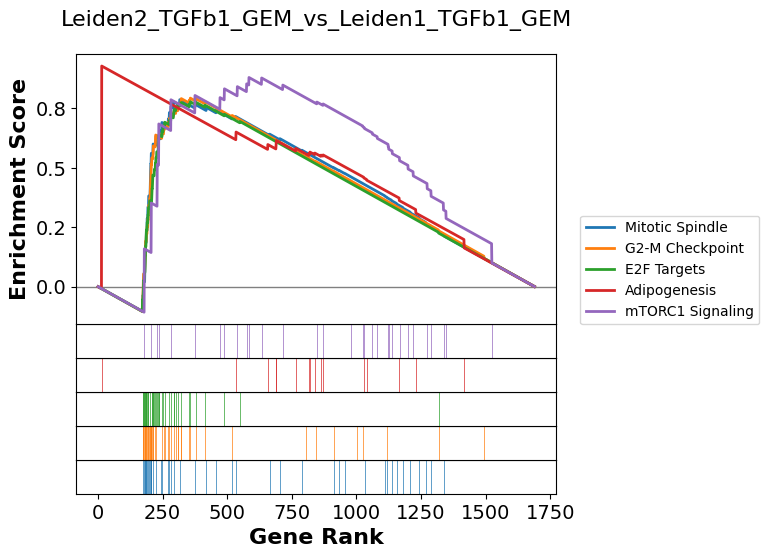

🖼️  Saved GSEA plot to: figures/gsea_Leiden2_TGFb1_GEM_vs_Leiden1_TGFb1_GEM.png

🔎 Running GSEA for: Leiden1_TGFb1_GEM_vs_Leiden0_GEM2


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results to: figures/gsea_Leiden1_TGFb1_GEM_vs_Leiden0_GEM2.csv


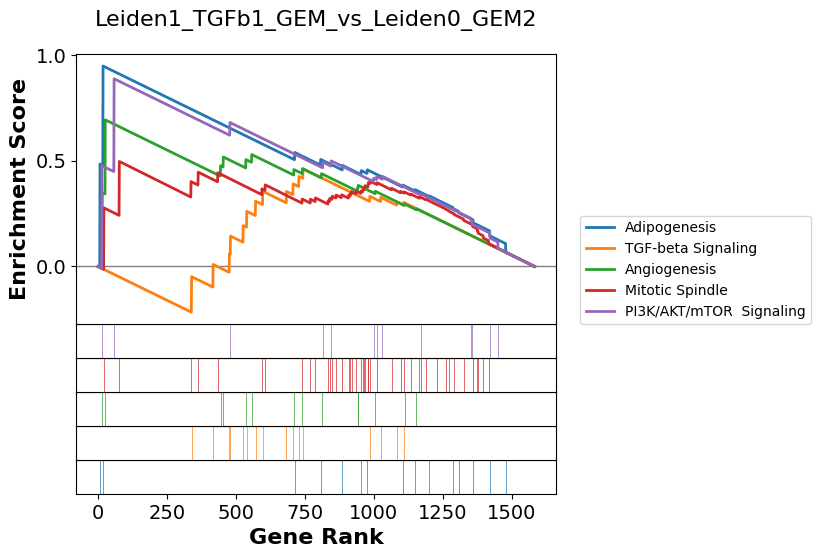

🖼️  Saved GSEA plot to: figures/gsea_Leiden1_TGFb1_GEM_vs_Leiden0_GEM2.png

🔎 Running GSEA for: Leiden2_TGFb1_GEM_vs_Leiden3_GEM2


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results to: figures/gsea_Leiden2_TGFb1_GEM_vs_Leiden3_GEM2.csv


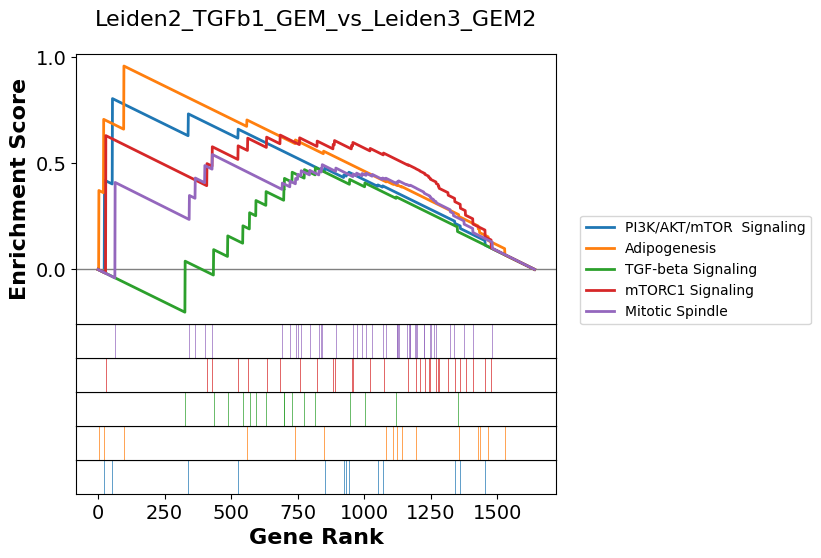

🖼️  Saved GSEA plot to: figures/gsea_Leiden2_TGFb1_GEM_vs_Leiden3_GEM2.png


In [305]:
import os
import scanpy as sc
import gseapy as gp
import pandas as pd
import matplotlib.pyplot as plt

# Make sure the output directory exists
os.makedirs("figures", exist_ok=True)

# Define leiden_gem-based comparisons
leiden_gem_comparisons = {
    "Leiden3_GEM2_vs_Leiden0_GEM2": (["Leiden3_GEM2"], ["Leiden0_GEM2"]),
    "Leiden2_TGFb1_GEM_vs_Leiden1_TGFb1_GEM": (["Leiden2_TGFb1_GEM"], ["Leiden1_TGFb1_GEM"]),
    "Leiden1_TGFb1_GEM_vs_Leiden0_GEM2": (["Leiden1_TGFb1_GEM"], ["Leiden0_GEM2"]),
    "Leiden2_TGFb1_GEM_vs_Leiden3_GEM2": (["Leiden2_TGFb1_GEM"], ["Leiden3_GEM2"]),
}

# Run GSEA for each comparison
for comp_name, (group1_cluster, group2_cluster) in leiden_gem_comparisons.items():
    print(f"\n🔎 Running GSEA for: {comp_name}")
    
    # Group labels
    group1 = f"1_{comp_name.split('_vs_')[0]}"
    group2 = f"2_{comp_name.split('_vs_')[1]}"

    # Label function
    def label_clusters(cluster):
        if cluster in group1_cluster:
            return group1
        elif cluster in group2_cluster:
            return group2
        else:
            return "NA"

    # Apply labels to the data
    adata.obs['compare_clusters'] = adata.obs['leiden_gem'].map(label_clusters)

    # Subset to relevant cells
    bdata = adata[adata.obs.compare_clusters.isin([group1, group2])].copy()
    if bdata.n_obs == 0:
        print(f"⚠️ Skipping {comp_name}: no cells found.")
        continue

    # Ensure consistent order
    bdata = bdata[bdata.obs.sort_values('compare_clusters').index]

    # Get expression matrix
    expression_df = bdata.to_df().T

    # Run GSEA
    try:
        res = gp.gsea(
            data=expression_df,
            gene_sets="MSigDB_Hallmark_2020",
            cls=bdata.obs.compare_clusters,
            permutation_num=1000,
            outdir=None,
            min_size=10,
            max_size=50,
            method='log2_ratio_of_classes',
            threads=8
        )

        # ✅ Save results as CSV
        csv_path = f"figures/gsea_{comp_name}.csv"
        res.res2d.to_csv(csv_path)
        print(f"📄 Saved GSEA results to: {csv_path}")

    except Exception as e:
        print(f"❌ GSEA failed for {comp_name}: {e}")
        continue

    # Plot and save top 5 enriched terms
    try:
        terms = res.res2d.Term
        fig = res.plot(terms[:5], show_ranking=False, legend_kws={'loc': (1.05, 0)})
        fig.suptitle(comp_name, fontsize=16)
        fig_path = f"figures/gsea_{comp_name}.png"
        fig.savefig(fig_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"🖼️  Saved GSEA plot to: {fig_path}")
    except Exception as e:
        print(f"⚠️ Plotting failed for {comp_name}: {e}")


### GEM inside the leiden clustering


🔎 Running GSEA for: Leiden3_GEM2_vs_Leiden3_nonGEM2


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results: figures/gsea_Leiden3_GEM2_vs_Leiden3_nonGEM2.csv


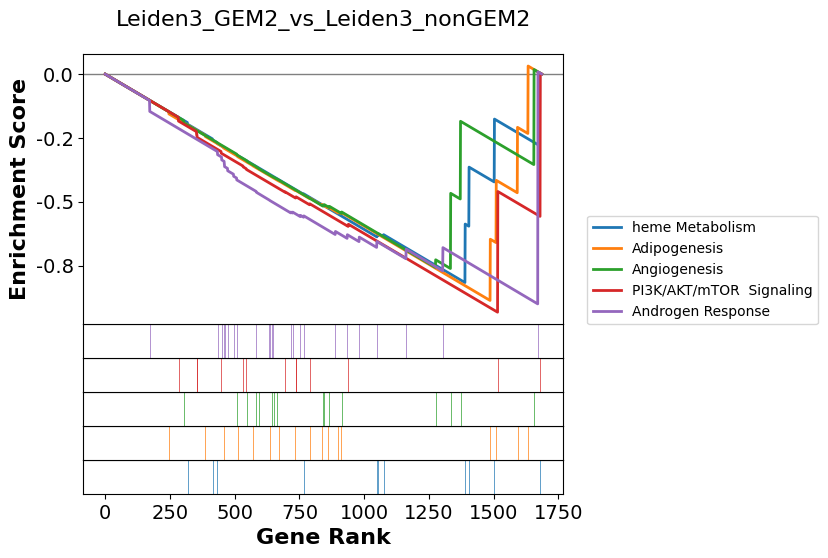

🖼️  Saved and displayed GSEA plot: figures/gsea_Leiden3_GEM2_vs_Leiden3_nonGEM2.png

🔎 Running GSEA for: Leiden0_GEM2_vs_Leiden0_nonGEM2


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results: figures/gsea_Leiden0_GEM2_vs_Leiden0_nonGEM2.csv


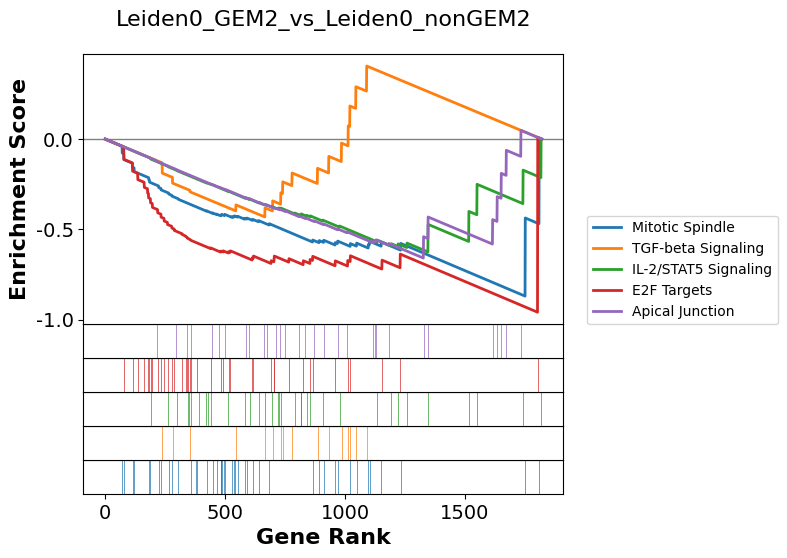

🖼️  Saved and displayed GSEA plot: figures/gsea_Leiden0_GEM2_vs_Leiden0_nonGEM2.png

🔎 Running GSEA for: Leiden2_TGFb1_GEM_vs_Leiden2_nonTGFb1_GEM


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results: figures/gsea_Leiden2_TGFb1_GEM_vs_Leiden2_nonTGFb1_GEM.csv


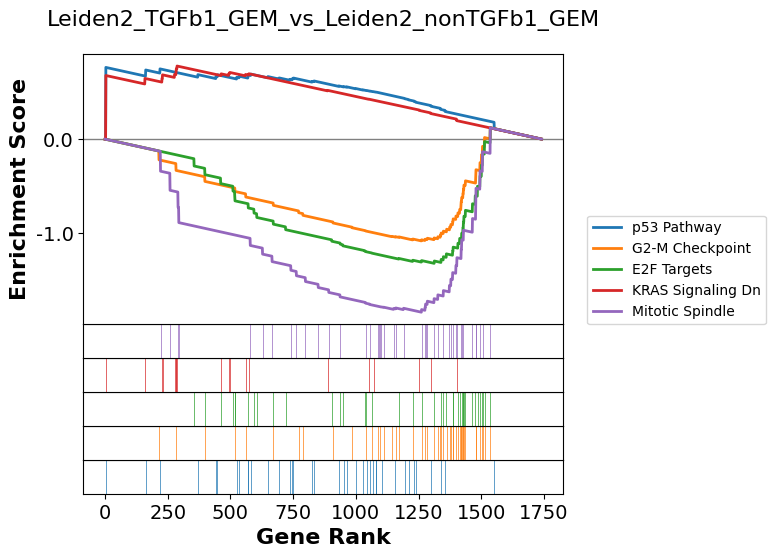

🖼️  Saved and displayed GSEA plot: figures/gsea_Leiden2_TGFb1_GEM_vs_Leiden2_nonTGFb1_GEM.png

🔎 Running GSEA for: Leiden1_TGFb1_GEM_vs_Leiden1_nonTGFb1_GEM


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results: figures/gsea_Leiden1_TGFb1_GEM_vs_Leiden1_nonTGFb1_GEM.csv


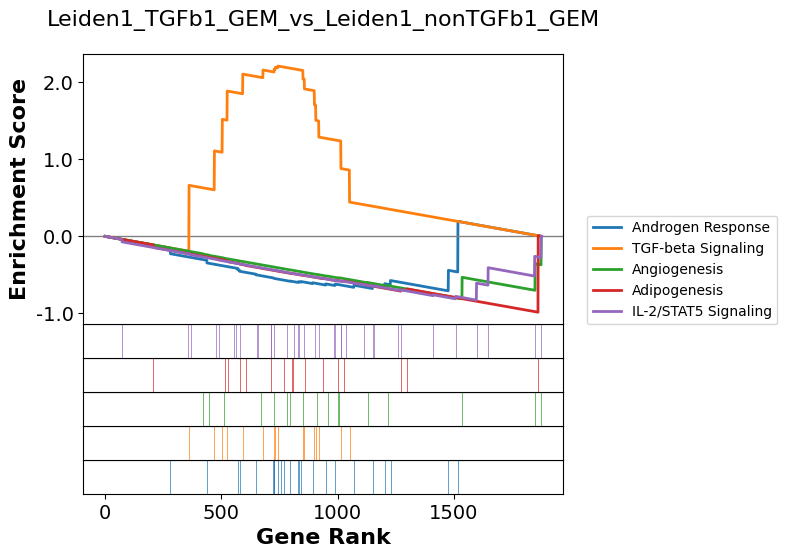

🖼️  Saved and displayed GSEA plot: figures/gsea_Leiden1_TGFb1_GEM_vs_Leiden1_nonTGFb1_GEM.png

🔎 Running GSEA for: Leiden3_GEM2_vs_Leiden0_nonGEM2


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/gseapy/gsea.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


📄 Saved GSEA results: figures/gsea_Leiden3_GEM2_vs_Leiden0_nonGEM2.csv


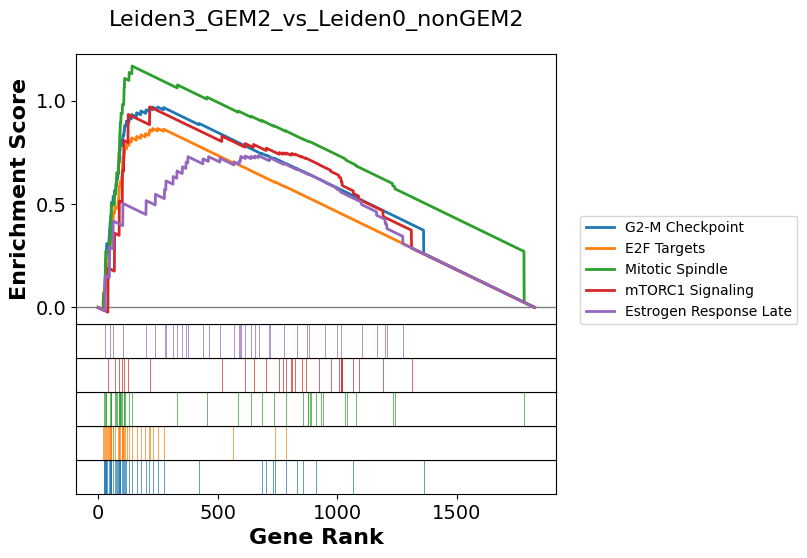

🖼️  Saved and displayed GSEA plot: figures/gsea_Leiden3_GEM2_vs_Leiden0_nonGEM2.png


In [308]:
import os
import scanpy as sc
import gseapy as gp
import pandas as pd
import matplotlib.pyplot as plt

# Ensure output directory exists
os.makedirs("figures", exist_ok=True)

# Define your leiden_gem_extended-based comparisons
leiden_gem_extended_comparisons = {
    "Leiden3_GEM2_vs_Leiden3_nonGEM2": (["Leiden3_GEM2"], ["Leiden3_nonGEM2"]),
    "Leiden0_GEM2_vs_Leiden0_nonGEM2": (["Leiden0_GEM2"], ["Leiden0_nonGEM2"]),
    "Leiden2_TGFb1_GEM_vs_Leiden2_nonTGFb1_GEM": (["Leiden2_TGFb1_GEM"], ["Leiden2_nonTGFb1_GEM"]),
    "Leiden1_TGFb1_GEM_vs_Leiden1_nonTGFb1_GEM": (["Leiden1_TGFb1_GEM"], ["Leiden1_nonTGFb1_GEM"]),
    "Leiden3_GEM2_vs_Leiden0_nonGEM2": (["Leiden3_GEM2"], ["Leiden0_nonGEM2"]),
}

# Run GSEA for each comparison
for comp_name, (group1_cluster, group2_cluster) in leiden_gem_extended_comparisons.items():
    print(f"\n🔎 Running GSEA for: {comp_name}")

    group1 = f"1_{comp_name.split('_vs_')[0]}"
    group2 = f"2_{comp_name.split('_vs_')[1]}"

    # Label function for leiden_gem_extended
    def label_clusters(cluster):
        if cluster in group1_cluster:
            return group1
        elif cluster in group2_cluster:
            return group2
        else:
            return "NA"

    # Apply group labels
    adata.obs['compare_clusters'] = adata.obs['leiden_gem_extended'].map(label_clusters)

    # Subset relevant cells
    bdata = adata[adata.obs.compare_clusters.isin([group1, group2])].copy()
    if bdata.n_obs == 0:
        print(f"⚠️ Skipping {comp_name}: no matching cells.")
        continue

    # Order cells
    bdata = bdata[bdata.obs.sort_values('compare_clusters').index]

    # Get expression matrix
    expression_df = bdata.to_df().T

    # Run GSEA
    try:
        res = gp.gsea(
            data=expression_df,
            gene_sets="MSigDB_Hallmark_2020",
            cls=bdata.obs.compare_clusters,
            permutation_num=1000,
            outdir=None,
            min_size=10,
            max_size=50,
            method='log2_ratio_of_classes',
            threads=8
        )

        # Save results to CSV
        csv_path = f"figures/gsea_{comp_name}.csv"
        res.res2d.to_csv(csv_path)
        print(f"📄 Saved GSEA results: {csv_path}")

    except Exception as e:
        print(f"❌ GSEA failed for {comp_name}: {e}")
        continue

    # Plot and display top 5 terms
    try:
        terms = res.res2d.Term
        fig = res.plot(terms[:5], show_ranking=False, legend_kws={'loc': (1.05, 0)})
        fig.suptitle(comp_name, fontsize=16)
        fig_path = f"figures/gsea_{comp_name}.png"
        fig.savefig(fig_path, dpi=300, bbox_inches='tight')
        plt.show()  # ✅ Display the figure
        print(f"🖼️  Saved and displayed GSEA plot: {fig_path}")
    except Exception as e:
        print(f"⚠️ Plotting failed for {comp_name}: {e}")


### Maryam, I have not used blow code

## Print Heatmap

### Barcode annotation or leiden

In [52]:
from gseapy import heatmap

# Plotting heatmap for a specific pathway
i = 1  # Index of the pathway to visualize

# Translate Barcode to Leiden Clusters
barcode_to_leiden = adata.obs['leiden'].to_dict()  # Map barcodes to Leiden clusters

# Extract barcodes from GSEA results
barcodes = res.res2d.columns.tolist()

# Print terms (optional)
terms = res.res2d.Term.tolist()

# Extract lead genes for the selected pathway
genes = res.res2d.Lead_genes[i].split(";")  # Ensure ";" is the correct separator

# Prepare the heatmap DataFrame
df_heat = res.heatmat.loc[genes]  # Extract expression data for the lead genes

# Map barcodes to Leiden clusters
new_columns = df_heat.columns.map(barcode_to_leiden.get)

# Assign the new column names back to the DataFrame
df_heat.columns = new_columns



In [53]:

# Calculate the average expression per Leiden group
average_expression_per_leiden = df_heat.groupby(df_heat.columns, axis=1).mean()

# Print the average expression for debugging
print("\nAverage expression per Leiden group:")
print(average_expression_per_leiden)





Average expression per Leiden group:
barcode           0         3
gene_name                    
BUB1       0.024549  0.658221
RRM2       0.064795  1.169487
AURKA      0.039139  0.705068
MCM4       0.050383  0.352019
DHFR       0.136769  0.618110
TUBA4A     0.016202  0.064295
CDKN1A     0.077637  0.223353


/tmp/ipykernel_752373/1467009363.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  average_expression_per_leiden = df_heat.groupby(df_heat.columns, axis=1).mean()


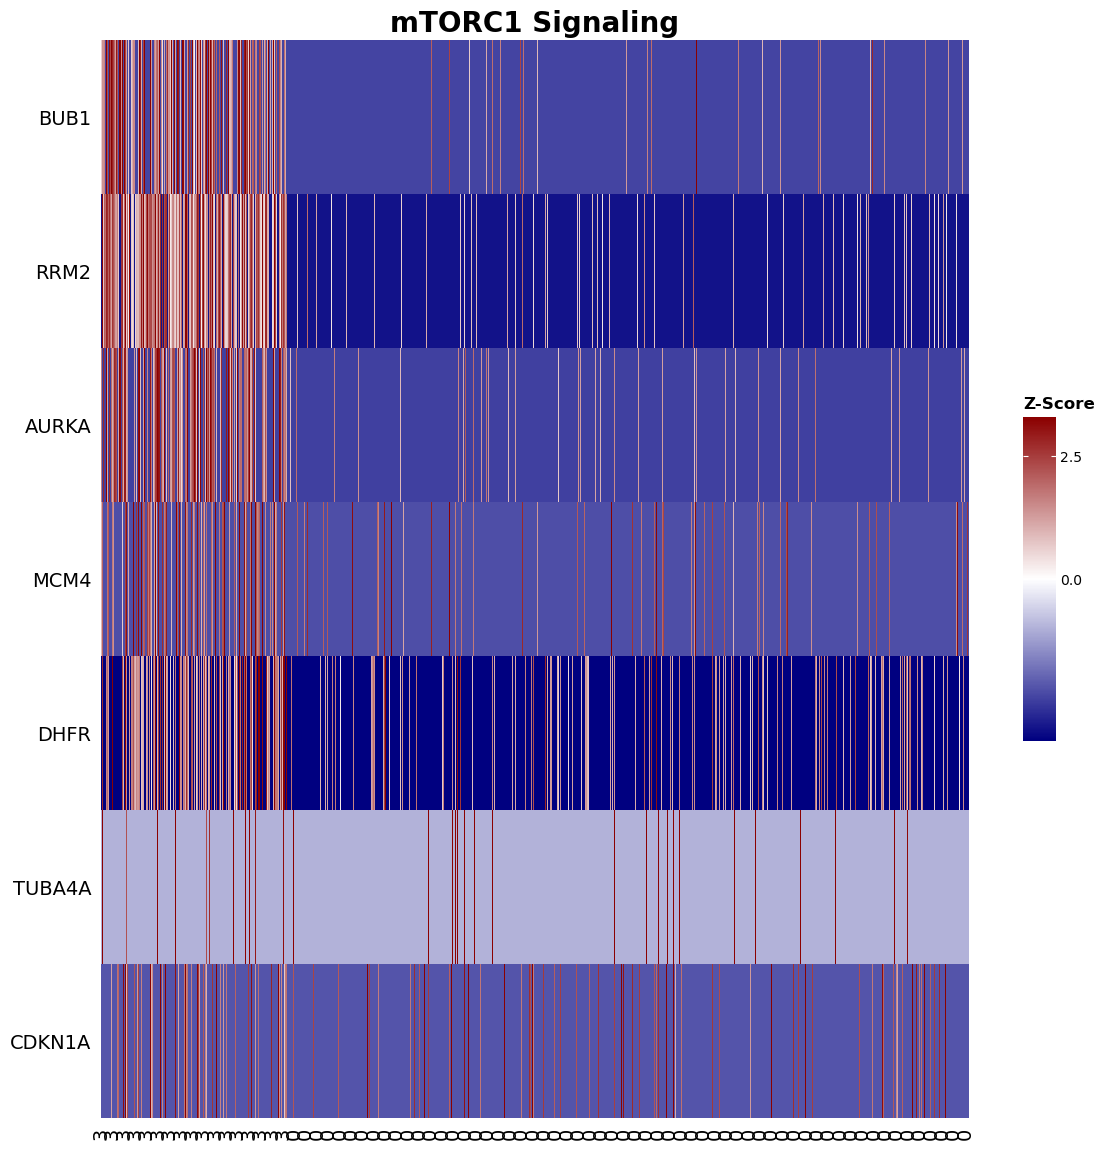

In [54]:
# Plot the heatmap
ax = heatmap(df=df_heat, z_score=0, title=terms[i], figsize=(14, 14))

#help(gp.gsea)